2. Logistic Regression
SHAILJA PATIL
24CS60R49

In [1]:
import pandas as pd
df =pd.read_csv('test.csv')
print(df.head())


                                               tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real


DATA PREPROCESSING AND data split : train_split.csv test_split.csv val_split.csv ALREADY DONE IN PART 1 , SO USING THE SPLIT FILES HERE DIRECTLY

---



In [2]:
# Import the necessary libraries for TF-IDF VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
train_data = pd.read_csv('train_split.csv')
val_data = pd.read_csv('val_split.csv')
test_data = pd.read_csv('test_split.csv')
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #  max_features set to 5000

# Fit and transform the training data to obtain TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])

# Transform the validation and test data using the same fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Optionally, check the shape of the transformed data
print(f"TF-IDF Training Data Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation Data Shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test Data Shape: {X_test_tfidf.shape}")

TF-IDF Training Data Shape: (8480, 5000)
TF-IDF Validation Data Shape: (1060, 5000)
TF-IDF Test Data Shape: (1060, 5000)


LOGISTIC REGRESSION

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:

y_train = train_data['label']
y_val = val_data['label']
y_test = test_data['label']

# Initialize Logistic Regression model
log_reg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

# Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best model
best_log_reg = grid_search.best_estimator_

# Predictions
y_pred = best_log_reg.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.9264
              precision    recall  f1-score   support

        fake       0.94      0.90      0.92       496
        real       0.92      0.95      0.93       564

    accuracy                           0.93      1060
   macro avg       0.93      0.92      0.93      1060
weighted avg       0.93      0.93      0.93      1060



CONFUSION MATRIX

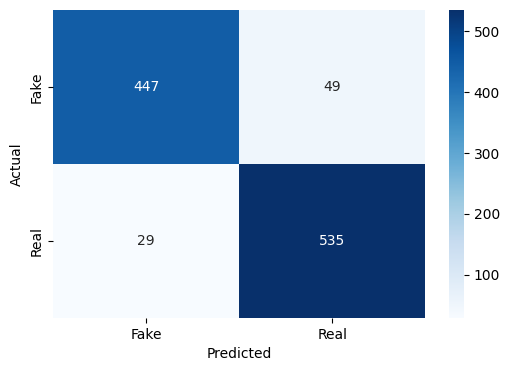

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
